In [1]:
import pymongo


client = pymongo.MongoClient("mongodb://localhost:27017")


import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing





#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)



df = pd.read_csv('Airline_Delay_Cause.csv')



df_1 = df.rename(columns={"arr_flights":"Number of flight arriving at airport", "arr_del15":"Number of flight more than 15 minutes late", "carrier_ct":"Number of flights delayed due to air carrier", "weather_ct":"Number of flights delayed due to weather", "nas_ct":"Number of flights delayed due to National Aviation System", "security_ct":"Number of flights delayed due to security", "late_aircraft_ct":"Number of flights delayed as a result of another flight on the same aircraft delayed", "arr_cancelled":"Number of flights cancelled", "arr_diverted":"Number of flights that were diverted", "arr_delay":"Total time of delayed flight", "carrier_delay":"Total time of delayed flight due to carrier", "weather_delay":"Total time of delayed flight due to weather", "nas_delay":"Total time of delayed flight due to national aviation system", "security_delay":"Total time of delayed flight due to security", "late_aircraft_delay":"Total number of time delayed flight as a result of a former flight on the same airplane being late"},inplace=True)

df = df.fillna(df.mean())
df.head()

# Convert the 'Total time of delayed flight' column to float64 data type
#df['Total time of delayed flight'] = df['Total time of delayed flight'].astype('float64')









# Create a new column called 'delayed' based on the values of the 'Total time of delayed flight in hour' column
df['Delayed'] = df['Total time of delayed flight'].apply(lambda x: 0 if x == 0 else 1)




df.head()

,year,month,carrier,carrier_name,airport,airport_name,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to air carrier,Number of flights delayed due to weather,Number of flights delayed due to National Aviation System,Number of flights delayed due to security,Number of flights delayed as a result of another flight on the same aircraft delayed,Number of flights cancelled,Number of flights that were diverted,Total time of delayed flight,Total time of delayed flight due to carrier,Total time of delayed flight due to weather,Total time of delayed flight due to national aviation system,Total time of delayed flight due to security,Total number of time delayed flight as a result of a former flight on the same airplane being late,Delayed
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,0.08,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0,1
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,5.01,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0,1
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,6.76,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0,1
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,2.40,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0,1
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,3.60,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0,1


In [2]:
weather_delay = df['Number of flights delayed due to weather']

In [3]:
mean_weather_delay = weather_delay.mean()
std_weather_delay = weather_delay.std()

print('Mean number of flights delayed due to weather:', mean_weather_delay)
print('Standard deviation of number of flights delayed due to weather:', std_weather_delay)


Mean number of flights delayed due to weather: 2.047227280366155
Standard deviation of number of flights delayed due to weather: 6.873312353780102


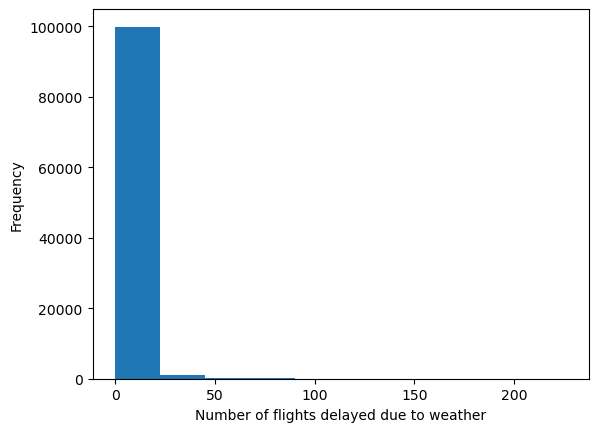

In [4]:
import matplotlib.pyplot as plt

plt.hist(weather_delay, bins=10)
plt.xlabel('Number of flights delayed due to weather')
plt.ylabel('Frequency')
plt.show()


In [5]:
number_of_flight = df['Number of flight arriving at airport']
total_delay = df['Number of flight more than 15 minutes late']


In [6]:
correlation = weather_delay.corr(total_delay).round(2)
print('Correlation between number of flights delayed due to weather and total number of delayed flights:', correlation)


Correlation between number of flights delayed due to weather and total number of delayed flights: 0.76


In [7]:
correlation_1 = weather_delay.corr(number_of_flight)
print('Correlation between number of flights delayed due to weather and total number of delayed flights:', correlation_1)


Correlation between number of flights delayed due to weather and total number of delayed flights: 0.7219347720194406


In [8]:
df = df[['year', 'month', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather', 'Total time of delayed flight', 'Total time of delayed flight due to weather', 'Delayed']]
df.head(1)


#from sklearn.preprocessing import LabelEncoder


#from sklearn.preprocessing import StandardScaler






# Create a label encoder object for each non-numeric column
#carrier = LabelEncoder()
#carrier_name = LabelEncoder()
#airport = LabelEncoder()
#airport_name = LabelEncoder()

# Fit the label encoder objects on the non-numeric columns and transform the values
#df['carrier'] = carrier.fit_transform(df['carrier'])
#df['carrier_name'] = carrier.fit_transform(df['carrier_name'])
#df['airport'] = airport.fit_transform(df['airport'])
#df['airport_name'] = airport.fit_transform(df['airport_name'])


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler to the data
#scaler.fit(df)

# Scale the data using the previously created scaler object
#df = scaler.transform(df)



,year,month,Number of flight arriving at airport,Number of flight more than 15 minutes late,Number of flights delayed due to weather,Total time of delayed flight,Total time of delayed flight due to weather,Delayed
0,2022,7,33.0,2.0,1.0,129.0,23.0,1


In [9]:
#Split the data into input features and target variable. In this case, the input features are the other columns except for the "Number of flights delayed due to weather" column, and the target variable is the "Number of flights delayed due to weather" column.
from sklearn.feature_selection import RFE
X = df.drop(['Number of flights delayed due to weather'], axis=1)
y = df['Number of flights delayed due to weather']








In [10]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest Regressor model
model = RandomForestRegressor()

# train the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 4.390500114630847


In [11]:
y_pred

array([0.    , 1.4425, 0.7235, ..., 0.0675, 0.    , 0.    ])

In [12]:
X1 = df[['year', 'month', 'Number of flight arriving at airport', 'Number of flight more than 15 minutes late', 'Number of flights delayed due to weather', 'Total time of delayed flight due to weather', 'Total time of delayed flight']]
y1 = df['Delayed']


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
print('Accuracy:', accuracy)





Accuracy: 1.0


In [17]:
new_data = pd.DataFrame({
    "year": [2024],
    "month": [6],
    "Number of flight arriving at airport": [500],
    "Number of flight more than 15 minutes late": [100],
    #"Number of flights delayed due to weather ": [2],
    "Total time of delayed flight": [1000],
    "Total time of delayed flight due to weather": [2],
    "Delayed": [0],
})


prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0.0716]


In [21]:
import pickle

# Save model to disk
with open('flight_delay_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
# Load model from disk
with open('flight_delay_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [22]:
new_data = pd.DataFrame({
    "year": [2020],
    "month": [11],
    "Number of flight arriving at airport": [500],
    "Number of flight more than 15 minutes late": [100],
    "Total time of delayed flight": [1000],
    "Total time of delayed flight due to weather": [2],
    "Delayed": [0],
})


prediction = model.predict(new_data)
print("Prediction:", prediction)

Prediction: [0.0652]
